In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('main.csv')

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'R2 Score': r2
    }

In [12]:
total_pred = []
total_test = []

In [13]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")


total_metrics = pd.DataFrame(columns=["MAE", "MSE", "RMSE", "MAPE (%)", "R2 Score"])
for rayon_id in range(0, 127):
    df_r = df[df['Район'] == rayon_id].sort_values('Год')
    series = df_r[['Год', 'Цена']].set_index('Год')['Цена']
    
    # Тренировочная и тестовая выборка
    train = series[:-2]
    test = series[-2:]
    
    # Сетка параметров
    p_values = range(0, 4)
    d_values = range(0, 2)
    q_values = range(0, 4)
    
    best_score = float("inf")
    best_order = None
    best_model = None
    
    # Подбор параметров по MSE
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(train, order=(p, d, q))
                    model_fit = model.fit()
                    forecast = model_fit.forecast(steps=2)
                    error = mean_squared_error(test, forecast)
                    
                    if error < best_score:
                        best_score = error
                        best_order = (p, d, q)
                        best_model = model_fit
                except:
                    continue
    
    print(f"Лучшая модель ARIMA: {best_order}, MSE: {best_score:.2f}")
    
    # Прогноз
    forecast = best_model.forecast(steps=2)

    current_metrics = evaluate_model(test.values, forecast.values)
    total_metrics.loc[len(total_metrics)] = current_metrics


    total_test.append(test.values)
    total_pred.append(forecast.values)
    # print(f"\nПрогноз на 2 года: {forecast.values}")
    # print(f"Истинные значения: {test.values}")


Лучшая модель ARIMA: (2, 1, 2), MSE: 16068836.60
Лучшая модель ARIMA: (3, 0, 3), MSE: 20835323.47
Лучшая модель ARIMA: (2, 1, 2), MSE: 179202537.54
Лучшая модель ARIMA: (1, 1, 2), MSE: 2050496.07
Лучшая модель ARIMA: (1, 1, 0), MSE: 1006047438.84
Лучшая модель ARIMA: (3, 1, 2), MSE: 81519201.45
Лучшая модель ARIMA: (3, 1, 2), MSE: 9841463.36
Лучшая модель ARIMA: (2, 1, 3), MSE: 59932017.26
Лучшая модель ARIMA: (2, 1, 3), MSE: 309531223.71
Лучшая модель ARIMA: (1, 1, 3), MSE: 4579348.12
Лучшая модель ARIMA: (0, 1, 3), MSE: 2961959.18
Лучшая модель ARIMA: (0, 1, 3), MSE: 10878135.83
Лучшая модель ARIMA: (2, 1, 3), MSE: 5141357.42
Лучшая модель ARIMA: (3, 1, 2), MSE: 14871234.00
Лучшая модель ARIMA: (3, 1, 2), MSE: 82825005.68
Лучшая модель ARIMA: (3, 1, 3), MSE: 28964401.80
Лучшая модель ARIMA: (0, 1, 3), MSE: 6265819.61
Лучшая модель ARIMA: (1, 1, 1), MSE: 1539846.66
Лучшая модель ARIMA: (2, 1, 2), MSE: 81213422.08
Лучшая модель ARIMA: (1, 1, 3), MSE: 62014191.85
Лучшая модель ARIMA: (3

In [14]:
total_test = np.vstack(total_test).flatten()
total_pred = np.vstack(total_pred).flatten()

In [15]:
evaluate_model(total_test, total_pred)

{'MAE': 5924.277551587905,
 'MSE': 84978861.0423676,
 'RMSE': np.float64(9218.39796506788),
 'MAPE (%)': np.float64(1.9782612735241254),
 'R2 Score': 0.9826465658931529}

In [8]:
total_metrics.mean()

MAE         5.924278e+03
MSE         8.497886e+07
RMSE        6.343021e+03
MAPE (%)    1.978261e+00
R2 Score   -2.910135e+02
dtype: float64

In [8]:
total_metrics

,MAE,MSE,RMSE,MAPE (%),R2 Score
0,3664.755226,1.606884e+07,4008.595340,1.355072,-6.200503
1,4313.720605,2.083532e+07,4564.572649,1.315588,0.858442
2,13071.634361,1.792025e+08,13386.655204,4.024955,-7.639191
3,1403.764110,2.050496e+06,1431.955330,0.624254,-0.005361
4,30829.661369,1.006047e+09,31718.250879,5.989318,-12.525689
...,...,...,...,...,...
122,3172.402162,1.407118e+07,3751.156525,1.283279,-18.408246
123,12863.180276,1.657007e+08,12872.477543,4.229279,-22.984496
124,2121.161866,4.682630e+06,2163.938543,0.449620,0.086527
125,1386.699972,2.377448e+06,1541.897681,0.628869,-117.184388


In [32]:
total_test[6:8]

array([226019.81351981, 223163.54816355])

In [31]:
total_pred[6:8]

array([224333.30855667, 224284.57141984])

In [29]:
total_test[8:10]

array([504171.2926249, 521420.1183432])

In [30]:
total_pred[8:10]

array([480796.79179842, 483135.29643168])

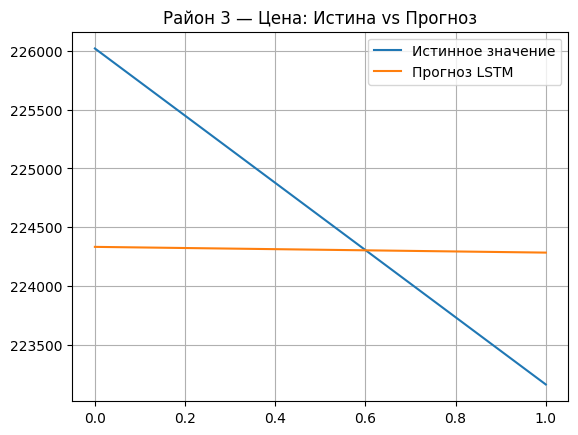

In [33]:
    plt.plot(total_test[6:8], label='Истинное значение')
    plt.plot(total_pred[6:8], label='Прогноз LSTM')
    plt.title(f'Район {3} — Цена: Истина vs Прогноз')
    plt.legend()
    plt.grid(True)
    plt.show()